In [1]:
import numpy as np
from numpy import sin, cos, exp, pi
import scipy.linalg as la
from matplotlib import pyplot as plt

def cheb(N):
    if N==0:
        D = 0
        x = 1
    else:
        x = cos(np.arange(0,N+1)*pi/N).reshape(N+1,1)
        c = (np.hstack([2,np.ones(N-1),2])*(-1)**(np.arange(0,N+1))).reshape(N+1,1)
        X = np.tile(x,(1,N+1))
        dX = X - X.T
        D = (c@((1/c).T))/(dX + np.eye(N+1))
        D = D - np.diag(np.sum(D.T,0))
    return D,x

def fourD(N):
    h = 2*pi/N
    x = h*np.arange(1,N+1).reshape(N,1)
    column = np.concatenate([[0] ,.5*(-1)**np.arange(1,N)*1/np.tan(np.arange(1,N)*h/2)]).reshape(N,1)
    D = la.toeplitz(column, np.vstack([column[0], column[-1:0:-1]]))
    return D,x

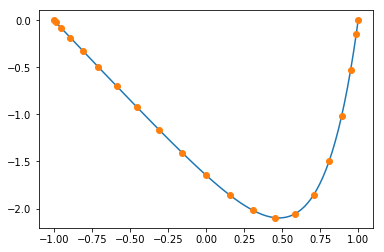

In [20]:
x = np.linspace(-1,1,200)
truef = lambda x: (np.exp(4*x) - np.sinh(4)*x - np.cosh(4))/16

N = 20
D,xvals = cheb(N)
D2 = D@D
D2 = D2[1:-1,1:-1]
f = np.exp(4*xvals[1:-1])
u = np.linalg.solve(D2,f) 
u = np.vstack([[0],np.copy(u),[0]])
plt.plot(x,truef(x))
plt.plot(xvals,u,"o") #Can get a finer grid by using interpolated points as interpolation points.

In [64]:
#Eigenvalue command: la.eig returns lambda: a vector of eigenvalues & matrix of eigenvectors.

N = 50
x = np.linspace(-1,1,N+1)
D, u = cheb(N)
D2 = D@D
D2 = D2[1:-1,1:-1]
l, v = la.eig(D2)
ii = np.argsort(-l)
l = l[ii]
v = v[:,ii]
print((l*(4/np.pi**2)).reshape(N-1,1))
print("----")
print((l*(4/np.pi**2)+np.arange(1,N)**2).reshape(N-1,1))

[[-1.00000000e+00+0.j]
 [-4.00000000e+00+0.j]
 [-9.00000000e+00+0.j]
 [-1.60000000e+01+0.j]
 [-2.50000000e+01+0.j]
 [-3.60000000e+01+0.j]
 [-4.90000000e+01+0.j]
 [-6.40000000e+01+0.j]
 [-8.10000000e+01+0.j]
 [-1.00000000e+02+0.j]
 [-1.21000000e+02+0.j]
 [-1.44000000e+02+0.j]
 [-1.69000000e+02+0.j]
 [-1.96000000e+02+0.j]
 [-2.25000000e+02+0.j]
 [-2.56000000e+02+0.j]
 [-2.89000000e+02+0.j]
 [-3.24000000e+02+0.j]
 [-3.61000000e+02+0.j]
 [-4.00000000e+02+0.j]
 [-4.41000000e+02+0.j]
 [-4.83999997e+02+0.j]
 [-5.28999984e+02+0.j]
 [-5.76000093e+02+0.j]
 [-6.24999831e+02+0.j]
 [-6.76004101e+02+0.j]
 [-7.28951141e+02+0.j]
 [-7.84263475e+02+0.j]
 [-8.39512061e+02+0.j]
 [-9.04596013e+02+0.j]
 [-9.47183751e+02+0.j]
 [-1.05591324e+03+0.j]
 [-1.07359185e+03+0.j]
 [-1.27251819e+03+0.j]
 [-1.27960278e+03+0.j]
 [-1.60222002e+03+0.j]
 [-1.60697415e+03+0.j]
 [-2.12542674e+03+0.j]
 [-2.12901334e+03+0.j]
 [-3.02471831e+03+0.j]
 [-3.02916336e+03+0.j]
 [-4.73193390e+03+0.j]
 [-4.73639244e+03+0.j]
 [-8.675211

(-120.99999999999977+0j)


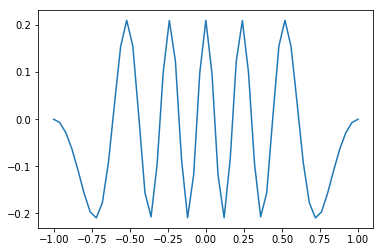

In [68]:
j = 10
print(l[j]*4/np.pi**2)
ef = np.hstack([0, v[:,j],0])
plt.plot(x,ef)